# 2. FERPlus Dataset 전처리 

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt 
import seaborn as sns

### 2.1. 전처리에 사용될 하이퍼 패러미터 선언

In [2]:
# Constants for FERPlus dataset
FERPLUS_IN_DIR = "datasets/ferPlus/raw/"
FERPLUS_OUT_DIR = "datasets/ferPlus/prep/"
FERPLUS_WIDTH = 48
FERPLUS_HEIGHT = 48

### 2.2 Dataset 로드 및 재가공
FERPlus Dataset은 FER2013의 확장형이기 때문에 둘 다 로드함  
여기서 FER2013의 레이블을 사용하지 않고 FERPlus의 레이블만을 사용하도록 재가공

In [3]:
data_x = pd.read_csv(FERPLUS_IN_DIR  + "fer2013.csv")
data_y = pd.read_csv(FERPLUS_IN_DIR + "fer2013new.csv")

In [4]:
data_x.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [5]:
data_y.head()

,Usage,Image name,neutral,happiness,surprise,sadness,anger,disgust,fear,contempt,unknown,NF
0,Training,fer0000000.png,4,0,0,1,3,2,0,0,0,0
1,Training,fer0000001.png,6,0,1,1,0,0,0,0,2,0
2,Training,fer0000002.png,5,0,0,3,1,0,0,0,1,0
3,Training,fer0000003.png,4,0,0,4,1,0,0,0,1,0
4,Training,fer0000004.png,9,0,0,1,0,0,0,0,0,0


In [6]:
data_x.drop(['emotion'], axis=1)
data_x = data_x[['pixels', 'Usage']]
data_x.head()

,pixels,Usage
0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [7]:
data_y = data_y.drop(['Usage', 'Image name'], axis=1)
data_y.head()

,neutral,happiness,surprise,sadness,anger,disgust,fear,contempt,unknown,NF
0,4,0,0,1,3,2,0,0,0,0
1,6,0,1,1,0,0,0,0,2,0
2,5,0,0,3,1,0,0,0,1,0
3,4,0,0,4,1,0,0,0,1,0
4,9,0,0,1,0,0,0,0,0,0


다수결 방식으로 FERPlus의 레이블을 결정함

In [8]:
data_y['emotion'] = data_y.idxmax('columns')
data_y = data_y.drop(['neutral', 'happiness', 'surprise', 'sadness', 'anger', 'disgust', 'fear', 'contempt', 'unknown', 'NF'], axis=1)
data_y.head()

,emotion
0,neutral
1,neutral
2,neutral
3,neutral
4,neutral


In [9]:
data_y = data_y.replace('neutral', 0)
data_y = data_y.replace('happiness', 1)
data_y = data_y.replace('surprise', 2)
data_y = data_y.replace('sadness', 3)
data_y = data_y.replace('anger', 4)
data_y = data_y.replace('disgust', 5)
data_y = data_y.replace('fear', 6)
data_y = data_y.replace('unknown', 7)
data_y = data_y.replace('NF', 8)

FER2013의 픽셀과 FERPlus의 라벨을 합침

In [10]:
data = pd.merge(data_y, data_x, left_index=True, right_index=True, how='left')
data.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,0,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,0,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,0,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [11]:
data = data[(data.emotion == 1) | (data.emotion == 3)]
data = data.replace(1, 0)
data = data.replace(3, 1)
data.head()

,emotion,pixels,Usage
6,1,20 17 19 21 25 38 42 42 46 54 56 62 63 66 82 1...,Training
7,0,77 78 79 79 78 75 60 55 47 48 58 73 77 79 57 5...,Training
8,0,85 84 90 121 101 102 133 153 153 169 177 189 1...,Training
14,0,4 2 13 41 56 62 67 87 95 62 65 70 80 107 127 1...,Training
16,0,14 14 18 28 27 22 21 30 42 61 77 86 88 95 100 ...,Training


In [12]:
data = data.reset_index()
data = data.drop(['index'], axis=1)
data.head()

,emotion,pixels,Usage
0,1,20 17 19 21 25 38 42 42 46 54 56 62 63 66 82 1...,Training
1,0,77 78 79 79 78 75 60 55 47 48 58 73 77 79 57 5...,Training
2,0,85 84 90 121 101 102 133 153 153 169 177 189 1...,Training
3,0,4 2 13 41 56 62 67 87 95 62 65 70 80 107 127 1...,Training
4,0,14 14 18 28 27 22 21 30 42 61 77 86 88 95 100 ...,Training


### 2.3. 합쳐진 FERPlus Dataset의 구성

In [13]:
data["Usage"].value_counts()

Training       11043
PrivateTest     1372
PublicTest      1311
Name: Usage, dtype: int64

FERPlus Dataset의 분리

In [14]:
# Seperate training and public/private test data
data_publ_test = data[data.Usage=="PublicTest"]
data_priv_test = data[data.Usage=="PrivateTest"]
data = data[data.Usage=="Training"]

In [15]:
Emotions = ["Happy", "Sad"]  # indices 0 to 9

In [16]:
data["emotion"].value_counts(sort=False)

0    7528
1    3515
Name: emotion, dtype: int64

### 2.3. 샘플 데이터 확인

In [17]:
def ferPlus_show_instance(index):
    """Shows the image and the emotion label of the index's instance."""
    image = np.reshape(data.at[index, "pixels"].split(" "), (FERPLUS_WIDTH, FERPLUS_HEIGHT)).astype("float")
    image -= np.mean(image)
    image /= np.std(image)
    print(Emotions[data.at[index, "emotion"]])
    plt.imshow(image, cmap="gray")

Happy


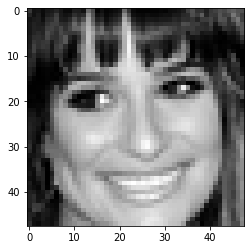

In [18]:
ferPlus_show_instance(np.random.randint(90,len(data)))

### 2.4. Dataset의 4D Array화

In [19]:
def ferPlus_to_X():
    """Transforms the (blank separated) pixel strings in the DataFrame to an 3-dimensional array 
    (1st dim: instances, 2nd and 3rd dims represent 2D image)."""
    
    X = []
    pixels_list = data["pixels"].values
    
    for pixels in pixels_list:
        single_image = np.reshape(pixels.split(" "), (FERPLUS_WIDTH, FERPLUS_HEIGHT)).astype("float")
        X.append(single_image)
        
    # Convert list to 4D array:
    X = np.expand_dims(np.array(X), -1)
    
    # Normalize image data:
    X -= np.mean(X, axis=0)
    X /= np.std(X, axis=0)
    
    return X

In [20]:
# Get features (image data)
X = ferPlus_to_X()
X.shape

(11043, 48, 48, 1)

In [21]:
# Get labels (one-hot encoded)
y = pd.get_dummies(data['emotion']).values
y.shape

(11043, 2)

In [22]:
# Save data
np.save(FERPLUS_OUT_DIR + "ferPlus_X", X)
np.save(FERPLUS_OUT_DIR + "ferPlus_y", y)